***
# 07. 딥 러닝(Deep Learning) 개요
***

딥 러닝(Deep Learning)은 머신 러닝(Machine Learning)의 특정한 한 분야로서 인공 신경망(Artificial Neural Network)의 층을 연속적으로 깊게 쌓아올려 데이터를 학습하는 방식을 말합니다.
딥 러닝이 화두가 되기 시작한 것은 2010년대의 비교적 최근의 일이지만, 딥 러닝의 기본 구조인 인공 신경망의 역사는 생각보다 오래되었습니다.
이번 챕터에서는 딥 러닝을 보다 쉽게 이해하기 위해 1957년의 초기 인공 신경망인 퍼셉트론에서부터 설명을 시작하여 층을 깊게 쌓아 학습하는 딥 러닝까지 개념을 점차적으로 확장해보겠습니다.
추가적으로 이번 챕터에서는 피드 포워드 신경망과 같은 기본적인 인공 신경망 용어들과 케라스의 사용 방법에 대해서 학습합니다.

## 07-01 퍼셉트론(Perceptron)
***

인공 신경망은 수많은 머신 러닝 방법 중 하나입니다.
하지만 최근 인공 신경망을 복잡하게 쌓아 올린 딥 러닝이 다른 머신 러닝 방법들을 뛰어넘는 성능을 보여주는 사례가 늘면서,
전통적인 머신 러닝과 딥 러닝을 구분해서 이해해야 한다는 목소리가 커지고 있습니다.
딥 러닝을 이해하기 위해서는 우선 인공 신경망에 대한 이해가 필요한데, 여기서는 초기의 인공 신경망인 퍼셉트론(Perceptron)에 대해서 이해합니다.

### 1. 퍼셉트론(Perceptron)
***
퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘입니다. 
퍼셉트론은 실제 뇌를 구성하는 신경 세포 뉴런의 동작과 유사한데, 신경 세포 뉴런의 그림을 먼저 보도록 하겠습니다.
뉴런은 가지돌기에서 신호를 받아들이고, 이 신호가 일정치 이상의 크기를 가지면 축삭돌기를 통해서 신호를 전달합니다.

![그림](img.png)

다수의 입력을 받는 퍼셉트론의 그림을 보겠습니다. 신경 세포 뉴런의 입력 신호와 출력 신호가 퍼셉트론에서 각각 입력값과 출력값에 해당됩니다.

![그림](img_1.png)

$x$는 입력값을 의미하며, $w$는 가중치(Weight), $y$는 출력값입니다.
그림 안의 원은 인공 뉴런에 해당됩니다. 실제 신경 세포 뉴런에서의 신호를 전달하는 축삭돌기의 역할을 퍼셉트론에서는 가중치가 대신합니다.
각각의 인공 뉴런에서 보내진 입력값 $x$는 각각의 가중치 $w$와 함께 종착지인 인공 뉴런에 전달되고 있습니다.

**각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미합니다.**

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고,
각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고,
그렇지 않을 경우에는 0을 출력합니다.
이러한 함수를 계단 함수(Step function)라고 하며, 아래는 그래프는 계단 함수의 하나의 예를 보여줍니다.

![그림](img_2.png)

이때 계단 함수에 사용된 이 임계치값을 수식으로 표현할 때는 보통 세타(Θ)로 표현합니다. 식으로 표현하면 다음과 같습니다.

![그림](img_3.png)

위의 식에서 임계치를 좌변으로 넘기고 편향 $b$(bias)로 표현할 수도 있습니다.
편향 $b$ 또한 퍼셉트론의 입력으로 사용됩니다.
보통 그림으로 표현할 때는 입력값이 1로 고정되고 편향 $b$가 곱해지는 변수로 표현됩니다.

![그림](img_4.png)
![그림](img_5.png)

이 책을 포함한 많은 인공 신경망 자료에서 편의상 편향 $b$가 그림이나 수식에서 생략되서 표현되기도 하지만
실제로는 편향 $b$ 또한 딥 러닝이 최적의 값을 찾아야 할 변수 중 하나입니다.

뒤에서 배우겠지만 이렇게 뉴런에서 출력값을 변경시키는 함수를 활성화 함수(Activation Function)라고 합니다.
초기 인공 신경망 모델인 퍼셉트론은 활성화 함수로 계단 함수를 사용하였지만,
그 뒤에 등장한 여러가지 발전된 신경망들은 계단 함수 외에도 여러 다양한 활성화 함수를 사용하기 시작했습니다.
사실 앞서 배운 시그모이드 함수나 소프트맥스 함수 또한 활성화 함수 중 하나입니다.

퍼셉트론을 배우기 전에 로지스틱 회귀를 먼저 배운 이유도 여기에 있습니다.
퍼셉트론의 활성화 함수는 계단 함수이지만 여기서 활성화 함수를 시그모이드 함수로 변경하면 방금 배운 퍼셉트론은 곧 이진 분류를 수행하는 로지스틱 회귀와 동일함을 알 수 있습니다.

다시 말하면 로지스틱 회귀 모델이 인공 신경망에서는 하나의 인공 뉴런으로 볼 수 있습니다.
로지스틱 회귀를 수행하는 인공 뉴런과 위에서 배운 퍼셉트론의 차이는 오직 활성화 함수의 차이입니다.

![그림](img_6.png)

### 2. 단층 퍼셉트론(Single-Layer Perceptron)
***
위에서 배운 퍼셉트론을 단층 퍼셉트론이라고 합니다.
퍼셉트론은 단층 퍼셉트론과 다층 퍼셉트론으로 나누어진다.

단층 퍼셉트론의 단계 
- 값을 보내는 단계
- 값을 받아서 출력하는 단계

이때 이 각 단계를 보통 층(layer)이라고 부르며, 이 두 개의 층을 입력층(input layer)과 출력층(output layer)이라고 합니다.

![그림](img_7.png)

단층 퍼셉트론이 어떤 일을 할 수 있으며 한계는 무엇인지 학습해보겠습니다.
컴퓨터는 두 개의 값 0과 1을 입력해 하나의 값을 출력하는 회로가 모여 만들어지는데, 이 회로를 게이트(gate)라고 부릅니다.
초기 형태의 인공 신경망인 단층 퍼셉트론은 간단한 XOR 게이트조차도 구현할 수 없는 부족한 인공 신경망이라는 지적을 받았습니다.
단층 퍼셉트론을 이용하면 AND, NAND, OR 게이트는 구현가능합니다. 게이트 연산에 쓰이는 것은 두 개의 입력값과 하나의 출력값입니다.
AND 게이트란 두 개의 입력값 $x1, x2$이 각각 0 또는 1의 값을 가질 수 있으면서 모두 1인 경우에만 출력값 $y$가 1이 나오는 구조를 말합니다.

![그림](img_8.png)

단층 퍼셉트론의 식을 통해 AND 게이트를 만족하는 두 개의 가중치와 편향 값에는 뭐가 있을까요?
각각 $w1$, $w2$, $b$라고 한다면 [0.5, 0.5, -0.7], [0.5, 0.5, -0.8] 또는 [1.0, 1.0, -1.0] 등 이 외에도 다양한 가중치와 편향의 조합이 나올 수 있습니다.
이해를 돕기 위해서 AND 게이트를 위한 매개변수 값을 가진 단층 퍼셉트론의 식을 파이썬 코드로 간단하게 구현해봅시다.

In [1]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

위의 함수에 AND 게이트의 입력값을 모두 넣어보면 오직 두 개의 입력값이 1인 경우에만 1을 출력합니다.

In [6]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

그렇다면 두 개의 입력값이 1인 경우에만 출력값이 0, 나머지 입력값의 쌍(pair)에 대해서는 모두 출력값이 1이 나오는 NAND 게이트는 어떨까요?

![그림](img_9.png)

앞서 언급했던 AND 게이트를 충족하는 가중치와 편향값인 [0.5, 0.5, -0.7]에 -를 붙여서 [-0.5, -0.5, +0.7]을 단층 퍼셉트론의 식에 넣어보면 NAND 게이트를 충족합니다.
파이썬 코드를 통해서 이를 확인해봅시다.

In [3]:
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1


단지 같은 코드에 함수 이름과 가중치와 편향만 바꿨을 뿐입니다. 퍼셉트론의 구조는 같기때문입니다.

In [4]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

NAND 게이트를 구현한 파이썬 코드에 입력값을 넣자, 두 개의 입력값이 1인 경우에만 0이 나오는 것을 확인할 수 있습니다.
퍼셉트론으로 NAND 게이트를 구현한 것입니다.
[-0.5, -0.5, -0.7] 외에도 퍼셉트론이 NAND 게이트의 동작을 하도록 하는 다양한 가중치와 편향의 값들이 있을 것입니다.

두 개의 입력이 모두 0인 경우에 출력값이 0이고 나머지 경우에는 모두 출력값이 1인 OR 게이트 또한 적절한 가중치 값과 편향 값만 찾으면 단층 퍼셉트론의 식으로 구현할 수 있습니다.

![그림](img_10.png)

예를 들어 각각 가중치와 편향에 대해서 [0.6, 0.6, -0.5]를 선택하면 OR 게이트를 충족합니다.

In [5]:
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1


In [6]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

이처럼 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트를 구현할 수 있으나 지금부터 설명할 XOR 게이트는 구현할 수 없습니다.
XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다.
위의 파이썬 코드에 아무리 수많은 가중치와 편향을 넣어봐도 XOR 게이트를 구현하는 것은 불가능합니다.
그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문입니다.

예를 들어 AND 게이트에 대한 단층 퍼셉트론을 시각화해보면 다음과 같습니다.

![그림](img_11.png)

그림에서는 출력값 0을 하얀색 원, 1을 검은색 원으로 표현했습니다. AND 게이트를 충족하려면 하얀색 원과 검은색 원을 직선으로 나누게 됩니다.
마찬가지로 NAND 게이트나 OR 게이트에 대해서도 시각화를 했을 때 직선으로 나누는 것이 가능합니다.

![그림](img_12.png)

그렇다면 XOR 게이트는 어떨까요? XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다.
XOR 게이트를 시각화해보면 다음과 같습니다.

![그림](img_13.png)

하얀색 원과 검은색 원을 직선 하나로 나누는 것은 불가능하므로 단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없습니다.
위의 좌측 그림과 같이 적어도 두 개의 선이 필요합니다. 이를 어떻게 해결할 수 있을까요? 이에 대한 해답은 다층 퍼셉트론입니다.
다층 퍼셉트론을 사용하면 여러 개의 선으로 분류하는 효과를 얻을 수 있습니다.

### 3. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
***

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있습니다. 퍼셉트론 관점에서 말하면 층을 더 쌓으면 만들 수 있습니다.
다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점입니다.
이렇게 입력층과 출력층 사이에 존재하는 층을 은닉층(hidden layer)이라고 합니다.
즉, 다층 퍼셉트론은 중간에 은닉층이 존재한다는 점이 단층 퍼셉트론과 다릅니다. 다층 퍼셉트론은 줄여서 MLP라고도 부릅니다.

![그림](img_14.png)

위의 그림은 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현한 다층 퍼셉트론의 예입니다.
XOR 예제에서는 은닉층 1개만으로 문제를 해결할 수 있었지만, 다층 퍼셉트론은 본래 은닉층이 1개 이상인 퍼셉트론을 말합니다.
즉, XOR 문제나 기타 복잡한 문제를 해결하기 위해서 다층 퍼셉트론은 중간에 수많은 은닉층을 더 추가할 수 있습니다.
은닉층의 개수는 2개일 수도 있고, 수십 개일수도 있고 사용자가 설정하기 나름입니다.
아래는 더 어려운 문제를 풀기 위해서 은닉층이 하나 더 추가되고(이 경우에는 은닉층이 2개), 뉴런의 개수를 늘린 다층 퍼셉트론의 모습을 보여줍니다.

![그림](img_15.png)

위와 같이 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network, DNN) 이라고 합니다.
심층 신경망은 다층 퍼셉트론만 이야기 하는 것이 아니라, 여러 변형된 다양한 신경망들도 은닉층이 2개 이상이 되면 심층 신경망이라고 합니다.

지금까지는 OR, AND, XOR 게이트 등. 퍼셉트론이 제대로 된 정답을 출력할 때까지 저자가 직접 가중치를 바꿔보면서 적절한 가중치를 수동으로 찾았습니다.
하지만 이제는 기계가 가중치를 스스로 찾아내도록 자동화시켜야하는데, 이것이 머신 러닝에서 말하는 훈련(training) 또는 학습(learning) 단계에 해당됩니다.
앞서 선형 회귀와 로지스틱 회귀에서 보았듯이 손실 함수(Loss function)와 옵티마이저(Optimizer)를 사용합니다.
그리고 만약 학습을 시키는 인공 신경망이 심층 신경망일 경우에는 이를 심층 신경망을 학습시킨다고 하여, 딥 러닝(Deep Learning)이라고 합니다.

In [7]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1
    
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1    
    
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1
    
# def XOR_gate_1(x1, x2):
#     s1 = OR_gate(x1, x2)
#     s2 = NAND_gate(x1, x2)
#     if x1 == 1 and x2 == 1:
#         return s2
#     else:
#         return s1
#     
# def XOR_gate_2(x1, x2):
#     s1 = OR_gate(x1, x2)
#     s2 = NAND_gate(x1, x2)
#     if x1 & x2 == 1:
#         return s2
#     else:
#         return s1
    
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    y = AND_gate(s1, s2)
    return y

In [25]:
# XOR_gate_1(0, 0), XOR_gate_1(0, 1), XOR_gate_1(1, 0), XOR_gate_1(1, 1)

(0, 1, 1, 0)

In [26]:
# XOR_gate_2(0, 0), XOR_gate_2(0, 1), XOR_gate_2(1, 0), XOR_gate_2(1, 1)

(0, 1, 1, 0)

In [8]:
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

## 07-02 인공 신경망(Artificial Neural Network) 훑어보기
***

### 1. 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)
***

![그림](img_16.png)

위 그림의 다층 퍼셉트론(MLP)과 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망을 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)이라고 합니다.

![그림](img_17.png)

위의 그림은 FFNN에 속하지 않는 RNN이라는 신경망을 보여줍니다.
이 신경망은 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용됩니다.

### 2. 전결합층(Fully-connected layer, FC, Dense layer)
***

다층 퍼셉트론은 은닉층과 출력층에 있는 모든 뉴런은 바로 이전 층의 모든 뉴런과 연결돼 있었습니다.
그와 같이 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층을 전결합층(Fully-connected layer) 또는 완전연결층이라고 합니다.
줄여서 FC라고 부르기도 합니다. 앞서 본 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층입니다.
동일한 의미로 밀집층(Dense layer) 이라고 부르기도 하는데, 케라스에서는 밀집층을 구현할 때 Dense()를 사용합니다.

### 3. 활성화 함수(Activation Function)
***

![그림](img_18.png)

앞서 배운 퍼셉트론에서는 계단 함수(Step function)를 통해 출력값이 0이 될지, 1이 될지를 결정했습니다.
이러한 매커니즘은 실제 뇌를 구성하는 신경 세포 뉴런이 전위가 일정치 이상이 되면 시냅스가 서로 화학적으로 연결되는 모습을 모방한 것입니다.
이렇게 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수(Activation function)라고 하는데 계단 함수는 이러한 활성화 함수의 하나의 예제에 불과합니다.

다양한 활성화 함수에 대해서 정리해봅시다. 일부는 머신 러닝 챕터에서 이미 봤던 함수들입니다.

#### (1) 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점입니다. 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 합니다.
예를 들어 $f(x) = wx + b$라는 함수가 있을 때, $w$와 $b$는 상수입니다.
이 식을 그래프로 시각화하면 직선입니다. 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말합니다.

인공 신경망에서 활성화 함수는 비선형 함수여야 합니다.
앞서 퍼셉트론에서도 계단 함수라는 활성화 함수를 사용했는데 계단 함수 또한 비선형 함수에 속합니다.
인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다.
그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다.
예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정해보겠습니다.
활성화 함수는 $f(x) = wx$라고 가정합니다.
여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서 $y(x) = f(f(f(x)))$가 됩니다.
이를 식으로 표현하면 $w \times w \times w \times w$입니다.
그런데 이는 잘 생각해보면 $w$의 세 제곱값을 $k$라고 정의해버리면 $y(x) = kx$와 같이 다시 표현이 가능합니다.
이 경우, 선형 함수로 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이가 없음을 알 수 있습니다.

활성화 함수가 존재하지 않는 선형 함수 층을 사용하지 않는다는 의미는 아닙니다.
종종 활성화 함수를 사용하지 않는 층을 비선형 층들과 함께 인공 신경망의 일부로서 추가하는 경우도 있는데, 학습 가능한 가중치가 새로 생긴다는 점에서 의미가 있습니다.
이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 이 책에서는 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현합니다.
뒤의 챕터에서 언급할 임베딩 층(embedding layer)도 일종의 선형층입니다. 임베딩 층에는 활성화 함수가 존재하지 않습니다.
활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)입니다.

파이썬을 통해 주로 사용되는 활성화 함수를 직접 그려봅시다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### (2) 계단 함수(Step function)

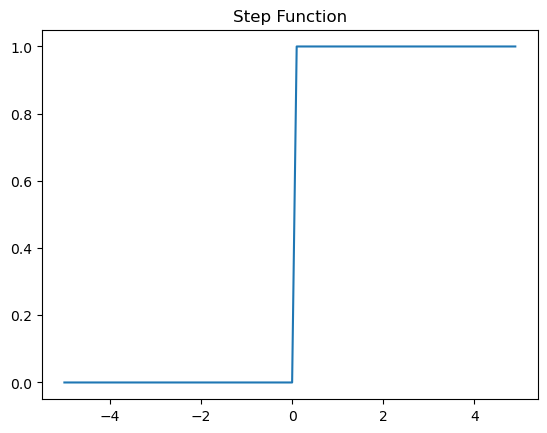

In [7]:
def step(x):
    return np.array(x > 0, dtype=int) # 0보다 크면 1 return 
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

계단 함수는 거의 사용되지 않지만 퍼셉트론을 통해 인공 신경망을 처음 배울 때 접하게 되는 활성화 함수입니다.

#### (3) 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수를 사용한 인공 신경망이 있다고 가정해보겠습니다.

![그림](img_19.png)

위 인공 신경망의 학습 과정은 다음과 같습니다.
우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고,
그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고,
그리고 이 손실(오차라고도 부릅니다. loss)을 미분을 통해서 기울기(gradient)를 구하고,
이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation)를 수행합니다.
역전파에 대해서는 뒤에서 더 자세히 설명하겠지만 일단 여기에서는 인공 신경망에서 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정이라고만 언급해두겠습니다.
역전파 과정에서 인공 신경망은 경사 하강법을 사용합니다.

이 시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생합니다.

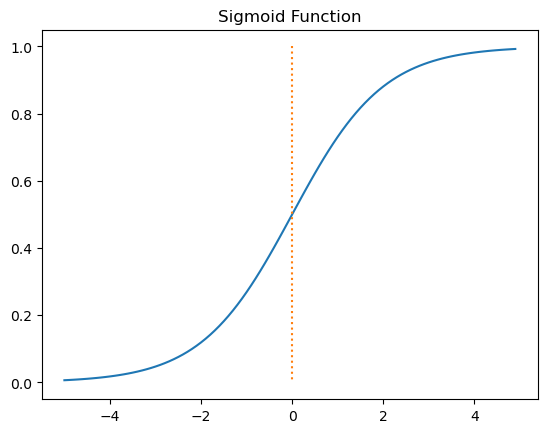

In [8]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프는 시그모이드 함수의 그래프를 보여줍니다.
시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있습니다.
기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠습니다.

![그래프](img_21.png)

주황색 구간에서는 미분값이 0에 가까운 아주 작은 값입니다. 초록색 구간에서의 미분값은 최대값이 0.25입니다.
다시 말해 시그모이드 함수를 미분한 값은 적어도 0.25 이하의 값입니다.
시그모이드 함수를 활성화 함수로하는 인공 신경망의 층을 쌓는다면, 가중치와 편향을 업데이트 하는 과정인 역전파 과정에서 0에 가까운 값이 누적해서 곱해지게 되면서,
앞단에는 기울기(미분값)가 잘 전달되지 않게 됩니다. 이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 합니다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다.
다시 말해 매개변수 $w$가 업데이트 되지 않아 학습이 되지를 않습니다.

![그래프](img_20.png)

위의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만,
앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여줍니다. 결론적으로 시그모이드 함수의 은닉층에서의 사용은 지양됩니다.
시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용합니다.

#### (4) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 그래프를 그려보겠습니다.

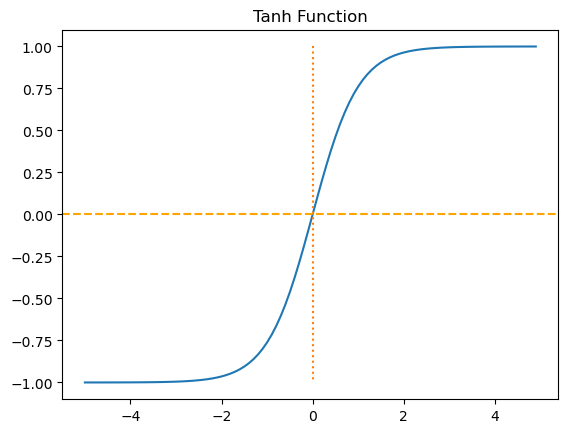

In [10]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

#### (5) 렐루 함수(ReLU)

인공 신경망의 은닉층에서 가장 인기있는 함수입니다. 수식은 $f(x) = max(0, x)$로 아주 간단합니다.

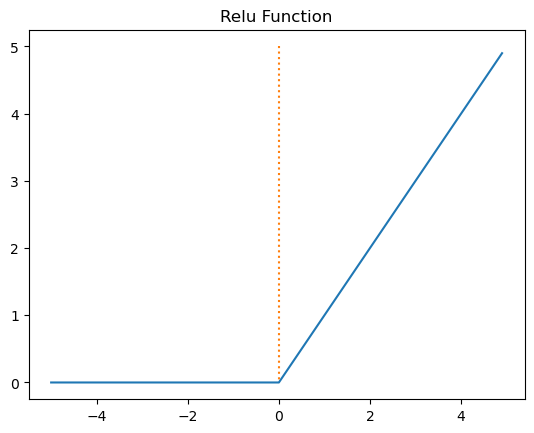

In [11]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하는 것이 특징인 함수로 출력값이 특정 양수값에 수렴하지 않습니다.
0이상의 입력값의 경우에는 미분값이 항상 1입니다. 깊은 신경망의 은닉층에서 시그모이드 함수보다 훨씬 더 잘 작동합니다.
뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠릅니다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기. 즉, 미분값도 0이 됩니다.
그리고 이 뉴런은 다시 회생하는 것이 매우 어렵습니다. 이 문제를 죽은 렐루(dying ReLU)라고 합니다.

#### (6) 리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개합니다.
Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다. 수식은 $f(x) = max(ax, x)$로 아주 간단합니다.
a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가집니다.
여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있습니다.

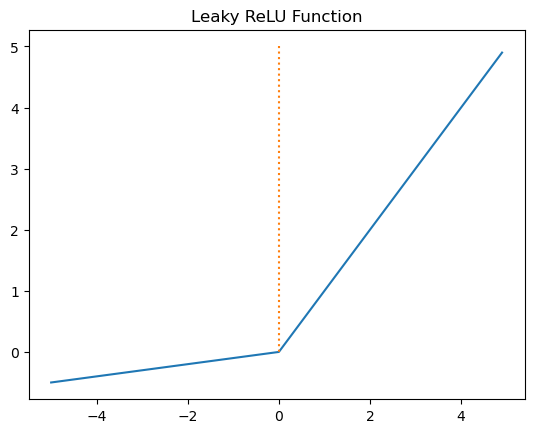

In [12]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()


위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았습니다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않습니다.

#### (7) 소프트맥스 함수(Softmax function)

은닉층에서는 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적입니다.
반면, 소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용됩니다.
시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면
소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다.
다시 말해서 딥 러닝으로 이진 분류를 할 때는 출력층에 앞서 배운 로지스틱 회귀를 사용하고,
딥 러닝으로 다중 클래스 분류 문제를 풀 때는 출력층에 소프트맥스 회귀를 사용한다고 생각할 수 있습니다.

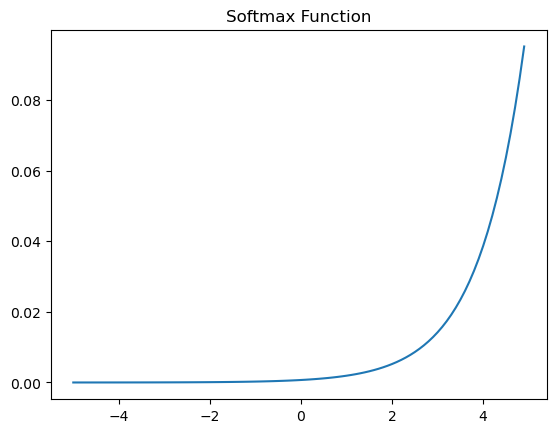

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## 07-03 행렬곱으로 이해하는 신경망
***

인공 신경망에서 입력층에서 출력층 방향으로 연산을 진행하는 과정을 순전파(Forward Propagation)라고 합니다.
다르게 말하면 주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정을 순전파라고 합니다.
여기서는 신경망의 순전파는 결과적으로 행렬의 곱셈으로 이해할 수 있다는 것과
다층 퍼셉트론 내의 학습 가능한 매개변수인 가중치 $w$와 편향 $b$의 개수를 추정하는 방법에 대해서 학습합니다.

### 1. 순전파(Foward Propagation)
***

![그림](img_22.png)

활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 딥 러닝 모델을 설계하고나면
입력값은 입력층, 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향합니다.
그리고 출력층에서 모든 연산을 마친 예측값이 나오게 됩니다.
이와 같이 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정을 순전파라고 합니다.

### 2. 행렬곱으로 순전파 이해하기
***

![그림](img_23.png)

위와 같은 인공 신경망이 있다고 해봅시다. 입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망을 구현해본다면 다음과 같습니다.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))

소프트맥스 회귀를 한다고 가정하고 활성화 함수는 소프트맥스 함수를 임의로 기재하였습니다.
인공 신경망이란 표현이 아직 어색한다면 앞에서 배운 소프트맥스 회귀 모델을 만들었다고 생각해도 되겠습니다.
소프트맥스 회귀는 출력 벡터의 차원을 2로 두면 이진 분류를 수행하는 모델이 됩니다. 로지스틱 회귀가 아닌 소프트맥스 회귀로도 이진 분류는 수행 가능함을 기억해둡시다.

케라스에서는 .summary()를 사용하면 해당 모델에 존재하는 모든 매개변수(가중치 $w$와 편향 $b$의 개수)를 확인할 수 있습니다.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


매개변수의 수가 8개라고 나옵니다.
위 신경망에서 학습가능한 매개변수 인 $w$와 $b$의 개수가 총 합해서 8개라는 의미입니다.
실제로 그런지 위 신경망을 행렬의 곱셈 관점에서 이해해봅시다.

![그림](img_24.png)

위 모델은 입력의 차원이 3, 출력의 차원이 2입니다.
또는 신경망의 용어로서 표현한다면, 입력층의 뉴런이 3개, 출력층의 뉴런이 2개라고 말할 수 있습니다.
위 신경망 그림에서 화살표 각각은 가중치 $w$를 의미하고 있습니다.
3개의 뉴런과 2개의 뉴런 사이에는 총 6개의 화살표가 존재하는데, 이는 위 신경망에서 가중치 $w$의 개수가 6개임을 의미합니다.

이를 행렬곱 관점에서는 3차원 벡터에서 2차원 벡터가 되기 위해서 3 × 2 행렬을 곱했다고 이해할 수 있습니다. 그리고 이 행렬 각각의 원소가 각각의 
$w$가 되는 것입니다. 위 그림에서는 
$y1$에 연결되는 화살표 $w1$, $w2$, $w3$를 주황색으로 표현하고, 
$y2$에 연결되는 화살표 $w4$, $w5$, $w6$를 초록색으로 표현했습니다.

일반적으로 동그란 뉴런과 화살표로 표현하는 인공 신경망의 그림에서는 편향 $b$의 경우에는 편의상 생략되는 경우가 많지만,
인공 신경망 내부적으로는 편향 $b$의 연산 또한 존재합니다.
위 그림에서 뉴런과 화살표로 표현한 인공 신경망의 그림에서는 편향을 표현하지 않았지만,
행렬 연산식에서는 $b1$과 $b2$를 표현하였습니다.
편향 $b$의 개수는 항상 출력의 차원을 기준으로 개수를 확인하면 됩니다.
위의 인공 신경망의 경우에는 출력의 차원이 2인데, 이에 따라서 편향 또한 $b1$과 $b2$로 두 개입니다.

가중치 $w$의 개수가 $w1$, $w2$, $w3$, $w4$, $w5$, $w6$로 총 6개이며
편향 $b$의 개수가 $b1$과 $b2$로 두 개이므로 총 학습가능한 매개변수의 수는 8개입니다.
이는 앞서 model.summary()를 하였을 때 확인한 매개변수의 수인 8개와 일치합니다.

$y1$과 $y2$를 구하는 과정을 수식으로 표현한다면 다음과 같이 표현할 수 있습니다.

![수식](img_25.png)

좀 더 간단하게 식을 표현해보겠습니다. 입력 $x1, x2, x3$을 벡터 $X$로 명명합니다.
$X = [x1, x2, x3]$

그리고 $w1$, $w2$, $w3$, $w4$, $w5$, $w6$를 원소로 하는 3 × 2 행렬을 가중치 행렬 $W$,
그리고 편향 $b1$, $b2$를 원소로 하는 벡터를 $B$,
그리고 $y1$, $y2$를 원소로하는 출력 벡터를 $Y$로 명명합시다.
이 경우, 위의 인공 신경망은 다음과 같이 표현할 수 있습니다.

![그림](img_26.png)

다시 말해 수식은 다음과 같습니다.

$Y = XW + B$

### 3. 행렬곱으로 병렬 연산 이해하기
***

인공 신경망을 행렬곱으로 구현할 때의 흥미로운 점은 행렬곱을 사용하면 병렬 연산도 가능하다는 점입니다.
위의 예시에서는 데이터 중 1개의 샘플만을 처리한다고 가정했습니다.
이번에는 인공 신경망이 4개의 샘플을 동시에 처리해본다고 가정해봅시다.
4개의 샘플을 하나의 행렬 $X$로 정의하고 인공 신경망의 순전파를 행렬곱으로 표현하면 다음과 같습니다.

![그림](img_27.png)

여기서 혼동하지 말아야 할 것은 인공 신경망의 4개의 샘플을 동시에 처리하고 있지만, 여기서 학습가능한 매개변수의 수는 여전히 8개라는 점입니다.
이렇게 인공 신경망이 다수의 샘플을 동시에 처리하는 것을 우리는 '배치 연산'이라고 부릅니다.

난이도를 올려서 중간에 층을 더 추가해봅시다.

### 4. 행렬곱으로 다층 퍼셉트론의 순전파 이해하기
***

![그림](img_28.png)

위와 같은 인공 신경망이 있다고 합시다. 주어진 인공 신경망을 케라스로 구현해본다면 아래와 같이 구현할 수 있습니다.

#### 1) 코드로 구현하기

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))


위의 코드의 주석에서 () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미하며 입력층부터 출력층까지 순차적으로 인공 신경망의 층을 한 층씩 추가하였습니다.
케라스를 사용하면 이렇게 간단하게 층을 딥하게 쌓은 딥 러닝 모델을 구현할 수 있습니다.

#### 2) 행렬의 크기 추정해보기

우선 각 층을 기준으로 입력과 출력의 개수를 정리하면 다음과 같습니다.

입력층 : 4개의 입력과 8개의 출력
은닉층1 : 8개의 입력과 8개의 출력
은닉층2 : 8개의 입력과 3개의 출력
출력층 : 3개의 입력과 3개의 출력

위의 정보를 가지고 층마다 생기는 가중치와 편향 행렬의 크기를 추정해봅시다. 단, 배치 크기는 1을 가정합니다.

##### 1. 입력층 ⇒ 은닉층1

![설명](img_29.png)

##### 2. 은닉층1 ⇒ 은닉층2

![설명](img_30.png)

##### 3. 은닉층2 ⇒ 은닉층3

![설명](img_31.png)

## 07-04 딥 러닝의 학습 방법
***

딥 러닝의 학습 방법의 이해를 위해 필요한 개념인 손실 함수, 옵티마이저, 에포크의 개념에 대해서 정리합니다.

### 1. 손실 함수(Loss function)
***

![그림](img_32.png)

손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수입니다. 이 두 값의 차이.
즉, 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아집니다.
회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용합니다.
손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 $w$와 편향 $b$의 값을 찾는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요합니다.
앞서 설명했던 손실 함수를 정리해봅시다.

#### 1) MSE(Mean Squared Error, MSE)

평균 제곱 오차는 선형 회귀를 학습할 때 배웠던 손실 함수입니다. 연속형 변수를 예측할 때 사용됩니다.

다음과 같이 compile의 loss에 문자열 'mse'라고 기재하여 사용할 수 있습니다.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

model = Sequential()

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

딥 러닝 자연어 처리는 대부분 분류 문제이므로 평균 제곱 오차보다는 아래의 크로스 엔트로피 함수들을 주로 사용합니다.

#### 2) 이진 크로스 엔트로피(Binary Cross-Entropy)

이항 교차 엔트로피라고도 부르는 손실 함수입니다.
출력층에서 시그모이드 함수를 사용하는 이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용합니다.
compile의 loss에 문자열로 'binary_crossentropy'를 기재해주면 됩니다. 이는 로지스틱 회귀에서 사용했던 손실 함수입니다.

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [13]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

#### 3) 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

범주형 교차 엔트로피라고도 부르는 손실 함수입니다.
출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용합니다.
compile의 loss에 문자열로 'categorical_crossentropy'를 기재해주면 됩니다. 소프트맥스 회귀에서 사용했던 손실 함수입니다.

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [15]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

만약 레이블에 대해서 원-핫 인코딩 과정을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶다면
다음과 같이 'sparse_categorical_crossentropy'를 사용합니다.

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

위 코드는 아래와 같이 사용할 수도 있습니다.

In [17]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

#### 4) 그 외에 다양한 손실 함수들

아래의 텐서플로우 공식 문서 링크에서 방금 언급하지 않은 손실 함수 외에도 다양한 손실 함수들을 확인할 수 있습니다.

[손실함수 참조링크](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

지금까지 자주 사용하는 손실 함수 몇 가지에 대해서 정리해봤습니다.
위 compile 코드에서 optimizer='adam' 이라는 부분에 주목해봅시다.
이는 아담이라는 옵티마이저를 사용했다라는 의미입니다.
손실 함수의 선정만큼이나 옵티마이저의 선정 또한 중요합니다.
이어서 옵티마이저에 대해서 정리해봅시다.

### 2. 배치 크기(Batch Size)에 따른 경사 하강법
***

![그림](img_33.png)

손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다.
여기서 배치(Batch)라는 개념에 대한 이해가 필요합니다. 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다.
전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

#### 1) 배치 경사 하강법(Batch Gradient Descent)

배치 경사 하강법(Batch Gradient Descent)은 가장 기본적인 경사 하강법입니다.
배치 경사 하강법은 옵티마이저 중 하나로 오차(loss)를 구할 때 전체 데이터를 고려합니다.
딥 러닝에서는 전체 데이터에 대한 한 번의 훈련 횟수를 1 에포크라고 하는데, 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행합니다.
배치 경사 하강법은 전체 데이터를 고려해서 학습하므로 한 번의 매개 변수 업데이트에 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있습니다.
<br/>
```
model.fit(X_train, y_train, batch_size=len(X_train))
```

#### 2) 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

기존의 배치 경사 하강법은 전체 데이터에 대해서 계산을 하다보니 시간이 너무 오래걸린다는 단점이 있습니다.
배치 크기가 1인 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법입니다.
더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있습니다.

![그림](img_34.png)

위 그림에서 좌측은 배치 경사 하강법, 우측은 배치 크기가 1인 확률적 경사 하강법이 최적해를 찾아가는 모습을 보여주고 있습니다.
확률적 경사 하강법은 매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만
하나의 데이터에 대해서만 메모리에 저장하면 되므로 자원이 적은 컴퓨터에서도 쉽게 사용가능 하다는 장점이 있습니다. 케라스에서는 아래와 같이 사용합니다.
<br/>
```
model.fit(X_train, y_train, batch_size=1)
```

#### 3) 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

전체 데이터도, 1개의 데이터도 아닐 때, 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법을 미니 배치 경사 하강법이라고 합니다.
미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있습니다.
가장 많이 사용되는 경사 하강법으로 앞으로 이 책에서도 주로 배치 크기를 지정하여 미니 배치 경사 하강법으로 학습하게 될 것입니다.
아래의 코드는 배치 크기를 128로 지정했을 경우를 보여줍니다.
<br/>
```
model.fit(X_train, y_train, batch_size=128)
```

배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적입니다.
만약, model.fit()에서 배치 크기를 별도로 지정해주지 않을 경우에 기본값은 2의 5제곱에 해당하는 숫자인 32로 설정됩니다.
지금까지 배치 크기에 따른 학습 방법의 차이를 알아봤습니다.
앞으로는 경사 하강법의 알고리즘 자체를 조금씩 달리한 다양한 옵티마이저에 대해서 설명합니다.

### 3. 옵티마이저(Optimizer)
***

#### 1) 모멘텀(Momentum)

모멘텀(Momentum)은 관성이라는 물리학의 법칙을 응용한 방법입니다.
모멘텀 경사 하강법에 관성을 더 해줍니다.
모멘텀은 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영합니다.
이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.

![그래프](img_35.png)

전체 함수에 걸쳐 최소값을 글로벌 미니멈(Global Minimum) 이라고 하고, 글로벌 미니멈이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum) 이라고 합니다. 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과를 얻을 수도 있습니다.
<br/>
```
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
```

#### 2) 아다그라드(Adagrad)

매개변수들은 각자 의미하는 바가 다른데, 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적입니다. 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이때 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.
<br/>
```
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
```

#### 3) 알엠에스프롭(RMSprop)

아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선하였습니다.
<br/>
```
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
```

#### 4) 아담(Adam)

아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다.
<br/>
```
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
```

#### 5) 사용 방법

각 옵티마이저 인스턴스는 compile의 optimizer에서 호출합니다. 예를 들어 아담(adam)은 다음과 같이 코드를 작성합니다.
<br/>
```
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
```

하지만 다음과 같이 단순히 문자열로 'adam'으로 작성하더라도 동작합니다.
<br/>
```
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
```

다른 옵티마이저들도 마찬가지입니다.
optimizer='sgd', optimizer='rmsprop'와 같이 각 옵티마이저를 문자열로 호출할 수 있습니다.
케라스의 옵티마이저 사용법은 아래의 링크에서 좀 더 상세히 확인할 수 있습니다.

[옵티마이저 참조링크](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

### 4. 역전파(BackPropagation)
***

이 부분은 05) 역전파 챕터로 별도 작성되었습니다.

### 5. 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)
***

기계는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트합니다.
머신 러닝에서는 이 과정을 학습이라고 합니다.
이를 현실의 학습에 비유하면 사람은 문제지의 문제를 풀고,
정답지의 정답을 보면서 채점을 하면서 부족했던 점을 깨달으며 머릿속의 지식이 업데이트되는 과정입니다.

그런데 사람마다 동일한 문제지와 정답지를 주더라도 공부 방법은 사실 천차만별입니다.
어떤 사람은 문제지 하나를 다 풀고 나서 정답을 채점하는데 어떤 사람은 문제지의 문제를 10개 단위로 끊어서 공부합니다.
문제 10개를 풀고 채점하고 다시 다음 문제 10개를 풀고 채점하고 반복하는 방식으로 학습하는 방식입니다.
또한 게으른 사람은 문제지를 세 번 공부하는데, 성실한 사람은 문제지의 문제를 달달 외울만큼 문제지를 100번 공부합니다.
기계도 똑같습니다. 같은 문제지와 정답지를 주더라도 공부 방법을 다르게 설정할 수 있습니다.

![그림](img_36.png)

위 그림은 에포크와 배치 크기와 이터레이션의 차이를 보여줍니다.

#### 1) 에포크(Epoch)

에포크란 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말합니다.
전체 데이터를 하나의 문제지에 비유한다면 문제지의 모든 문제를 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태를 말합니다.

만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습합니다.
문제지에 비유하면 문제지를 50번 푼 셈입니다.
이 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있습니다.

#### 2) 배치 크기(Batch size)

배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말합니다.
현실에 비유하면 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제입니다.
사람은 문제를 풀고 정답을 보는 순간 부족했던 점을 깨달으며 지식이 업데이트 된다고 하였습니다.
기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트합니다.
여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 겁니다.

사람이 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200입니다.
기계는 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트 합니다.

여기서 주의할 점은 배치 크기와 배치의 수는 다른 개념이라는 점입니다.
**전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다.**
이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다.
이때 **배치의 수**를 **이터레이션**이라고 합니다.

#### 3) 이터레이션(Iteration) 또는 스텝(Step)

이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다.
또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다.
전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10입니다.
이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미합니다.
배치 크기가 1인 확률적 경사 하강법을 이 개념을 가지고 다시 설명하면 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행합니다.
이터레이션은 스텝(Step)이라고 부르기도 하므로 두 용어 모두 기억해둡시다.